In [2]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [3]:
def extract_max_resident_set_size(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        match = re.search(r"Maximum resident set size \(kbytes\): (\d+)", content)
        if match:
            return int(match.group(1))
        else:
            return None

In [4]:
def extract_wall_clock_time(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        match = re.search(r'Elapsed \(wall clock\) time \(h:mm:ss or m:ss\): (\S+)', content)
        if match:
            wall_clock_time = match.group(1)
            #print(wall_clock_time)
            # Split the time into hours, minutes, and seconds
            time_parts = wall_clock_time.split(':')
            
            # Initialize variables for hours, minutes, and seconds
            hours = 0
            minutes = 0
            seconds = 0

            # Assign values based on the number of time parts
            if len(time_parts) == 3:
                hours = int(time_parts[0])
                minutes = int(time_parts[1])
                seconds = float(time_parts[2])
            elif len(time_parts) == 2:
                minutes = int(time_parts[0])
                seconds = float(time_parts[1])
            elif len(time_parts) == 1:
                seconds = float(time_parts[0])

            # Convert to total seconds
            total_seconds = hours * 3600 + minutes * 60 + seconds
            return total_seconds/3600
        else:
            return None

In [5]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines  # For dummy handles

def plot_function(input_list, fig_path):
    
    fig = plt.figure(figsize=(10, 3.74))
    gs = GridSpec(1, 3, width_ratios=[1, 1, 0.67])  # 2 rows, 3 columns; last column for legend

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax_legend_data = fig.add_subplot(gs[:, 2])  # This will be the space for the legend
    ax_legend_data.axis('off')  # Turn off the axis for the legend

    # Datasets color palette
    color_palette = ['blue', 'red']
    # Methods marker palette
    marker_palette = ['o', '^', 's', 'p', 'h', '+', 'x', '*']
    
    # Lists to store legend handles and labels
    dataset_handles = []
    dataset_labels = []
    
    method_labels = [
        r"$\mathbf{oarfish{-}ac}$:" f" align-based mode\n               with coverage model", 
        r"$\mathbf{oarfish{-}anc}$:" f" align-based mode\n             without coverage model", 
        r"$\mathbf{oarfish{-}rc}$:" f" read-based mode\n              with coverage model", 
        r"$\mathbf{oarfish{-}rnc}$:" f" read-based mode\n            without coverage model",
        r"$\mathbf{NanoCount{-}nf}$:" f" disabled filters"
    ]

    cl = 0
    ml = 0
    
    for v1, v2 in {'NA12878_1DcDNA': '1D cDNA', "NA12878_directRNA": "direct RNA"}.items():
        # Plot for dataset
        line, = ax1.plot(list(input_list[v1]['Method']), list(input_list[v1]['time']), 
                         marker=marker_palette[ml], ms=6, linestyle='--', lw=1, color=color_palette[cl], label=f"{v2}")
        dataset_handles.append(line)
        dataset_labels.append(f"{v2}")
        
        cl += 1
        ml += 1
    
    ax1.set_xlabel('Method', fontsize=10)
    ax1.set_ylabel('Elapsed Time (hour)', fontsize=10)
    ax1.set_title('Elapsed Time', fontsize=10)
    ax1.grid(True)  # Add grid lines
    #ax1.set_yscale('log')
    ax1.set_xticklabels(list(input_list[v1]['Method']), rotation=45, fontsize=9, ha='right')  # Rotate x-axis labels for readability
    ax1.text(0.0, 1.05, 'a)', transform=ax1.transAxes, ha="left", va="center", fontsize=10, weight="bold")
   
    cl = 0
    ml = 0
    
    for v1, v2 in {'NA12878_1DcDNA': '1D cDNA', "NA12878_directRNA": "direct RNA"}.items():
        line, = ax2.plot(list(input_list[v1]['Method']), list(input_list[v1]['memory']), 
                         marker=marker_palette[ml], ms=6, linestyle='--', lw=1, color=color_palette[cl], label=f"{v2}")
        cl += 1
        ml += 1
    ax2.set_xlabel('Method', fontsize=10)
    ax2.set_ylabel('Memory Usage (GB)', fontsize=10)
    ax2.set_title('Memory Usage', fontsize=10)
    ax2.grid(True)  # Add grid lines
    #ax2.set_yscale('log')
    ax2.set_xticklabels(list(input_list[v1]['Method']), rotation=45, fontsize=9, ha='right')  # Rotate x-axis labels for readability
    ax2.text(0.0, 1.05, 'b)', transform=ax2.transAxes, ha="left", va="center", fontsize=10, weight="bold")
    
    # Create the dataset legend (position at the top)
    dataset_legend = ax_legend_data.legend(handles=dataset_handles, labels=dataset_labels, 
                                           loc='upper center', fontsize=10, title="Dataset", bbox_to_anchor=(0.35, 1.05))
    
    # Create dummy handles for the method labels legend
    #dummy_handles = [mlines.Line2D([], [], color='black', marker='', label=label, linestyle='dotted', linewidth=1) for label in method_labels]
    dummy_handles = [mlines.Line2D([], [], color='black', marker='>', label=label, linestyle='', linewidth=1) for label in method_labels]

    # Add a separate legend for method labels below the dataset legend (position lower)
    method_legend = ax_legend_data.legend(handles=dummy_handles, labels=method_labels, 
                                          loc='lower center', fontsize=9, title="Methods", ncol=1, bbox_to_anchor=(0.38, -0.3))
    
    # Add both legends to the axes
    ax_legend_data.add_artist(dataset_legend)  # Add the dataset legend manually
    ax_legend_data.add_artist(method_legend)  # Add the method legend manually
    
    plt.tight_layout()
    
    # Save the figure as a JPEG file
    directory = os.path.dirname(fig_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig(fig_path, format='jpg', dpi=300, bbox_inches='tight')
    
    plt.show()


In [6]:
quant_ont = '/mnt/scratch2/zahra/sim_quant_time/nanosim_quant'
quant_pacbio = '/mnt/scratch2/zahra/sim_quant_time/tksm_quant_new_model'

data_dict = {
    "NA12878_directRNA": ("drna", quant_ont),
    "NA12878_1DcDNA": ("cdna", quant_ont)
    }

method_list = ["oarfish-ac", "oarfish-anc", "oarfish-rc", "oarfish-rnc", "NanoCount", "NanoCount-nf", "bambu", "lr-kallisto", "TranSigner", "IsoQuant"]

final_df = {}

for k, (v, quant_dir) in data_dict.items():
    final_df[k] = pd.DataFrame()
    final_df[k]["Method"] = [method + "*" if method == "ESPRESSO" else method for method in method_list]
    
    #shr dataset
    file_path = {}
    file_path = {'oarfish align (cov)':     join(quant_dir, 'oarfish_align_quant', k, v, 'time_cov'),
                 'oarfish align (nocov)':   join(quant_dir, 'oarfish_align_quant', k, v, 'time_nocov'),
                 'oarfish raw (cov)':       join(quant_dir, 'oarfish_raw_quant', k, v, 'time_cov'),
                 'oarfish raw (nocov)':     join(quant_dir, 'oarfish_raw_quant', k, v, 'time_nocov'),
                 'NanoCount':               join(quant_dir, 'NanoCount_quant', k, v, 'time_info'),
                 'NanoCount (nofilt)':      join(quant_dir, 'NanoCount_quant_nofilt', k, v, 'time_info'),
                 'bambu':                   join(quant_dir, 'bambu_quant', k, v, 'time_info'),
                 'lr-kallisto':             join(quant_dir, 'lr-kallisto', k, v),
                 'TranSigner':              join(quant_dir, 'transigner_quant', k, v),
                 'IsoQuant':                join(quant_dir, 'IsoQuant_quant', k, v, 'time_info')}
    
    align_path = {'align_T':                 join(quant_dir, f"alignment/{k}/{v}_time_T"),
                  'align_G':                 join(quant_dir, f"alignment/{k}/{v}_time_G")}

    idx_path = {'idx_T':                 join(quant_dir, f"alignment/idx_time_T"),
                'idx_G':                 join(quant_dir, f"alignment/idx_time_G")}
    
    elapsed_time = []
    memory_usage = []
    for method, path in file_path.items():
        if method in ["oarfish align (cov)", "oarfish align (nocov)"]:
            elapsed_time.append(extract_wall_clock_time(path) + extract_wall_clock_time(align_path['align_T']))
            memory_usage.append(max(extract_max_resident_set_size(path), extract_max_resident_set_size(align_path['align_T'])) / 1e6)
            
        elif method in ["oarfish raw (cov)", "oarfish raw (nocov)"]:
            elapsed_time.append(extract_wall_clock_time(path))
            memory_usage.append(extract_max_resident_set_size(path) / 1e6)
            
        elif method in ["NanoCount", "NanoCount (nofilt)"]:
            elapsed_time.append(extract_wall_clock_time(path) + extract_wall_clock_time(align_path['align_T']))
            memory_usage.append(max(extract_max_resident_set_size(path), extract_max_resident_set_size(align_path['align_T'])) / 1e6)

        elif method == "bambu":
            elapsed_time.append(extract_wall_clock_time(path) + extract_wall_clock_time(align_path['align_G']) - extract_wall_clock_time(idx_path['idx_G']))
            memory_usage.append(max(extract_max_resident_set_size(path), extract_max_resident_set_size(align_path['align_G'])) / 1e6)

        elif method == "lr-kallisto":
            elapsed_time.append(extract_wall_clock_time(path + '/time_kallisto_bus') + extract_wall_clock_time(path + '/time_bustools_sort') + extract_wall_clock_time(path + '/time_bustools_count') + extract_wall_clock_time(path + '/time_kallisto_quant'))
            memory_usage.append(max(extract_max_resident_set_size(path + '/time_kallisto_bus'), extract_max_resident_set_size(path + '/time_bustools_sort'), extract_max_resident_set_size(path + '/time_bustools_count'), extract_max_resident_set_size(path + '/time_kallisto_quant')) / 1e6)
            
        elif method == "TranSigner":
            elapsed_time.append(extract_wall_clock_time(path+"/time_align") + extract_wall_clock_time(path+"/time_prefilter") + extract_wall_clock_time(path+"/time_em") - extract_wall_clock_time(idx_path['idx_T']))
            memory_usage.append(max(extract_max_resident_set_size(path+"/time_align"), extract_max_resident_set_size(path+"/time_prefilter"), extract_max_resident_set_size(path+"/time_em")) / 1e6) 

        elif method == "IsoQuant":
            elapsed_time.append(extract_wall_clock_time(path) - extract_wall_clock_time(idx_path['idx_G']))
            memory_usage.append(extract_max_resident_set_size(path) / 1e6)
            
        elif method == "ESPRESSO":
            elapsed_time.append(extract_wall_clock_time(path+"/time_ESPRESSO_S") + extract_wall_clock_time(path+"/time_ESPRESSO_C") + extract_wall_clock_time(path+"/time_ESPRESSO_Q") + extract_wall_clock_time(path+"/time_sort") + extract_wall_clock_time(align_path['align_G']) - extract_wall_clock_time(idx_path['idx_G']))
            memory_usage.append(max(extract_max_resident_set_size(path+"/time_ESPRESSO_S"), extract_max_resident_set_size(path+"/time_ESPRESSO_C"), extract_max_resident_set_size(path+"/time_ESPRESSO_Q"), extract_max_resident_set_size(path+"/time_sort"), extract_max_resident_set_size(align_path['align_G'])) / 1e6)            
        
            
    final_df[k]["time"] = elapsed_time
    final_df[k]["memory"] = memory_usage
    

In [7]:
final_df

{'NA12878_directRNA':          Method      time     memory
 0    oarfish-ac  0.148464   8.191172
 1   oarfish-anc  0.152806   8.191172
 2    oarfish-rc  0.106867   4.993836
 3   oarfish-rnc  0.113097   4.900724
 4     NanoCount  0.174683   8.191172
 5  NanoCount-nf  0.303075  19.482864
 6         bambu  0.459408  29.456616
 7   lr-kallisto  0.084256   4.201908
 8    TranSigner  0.256436  26.495936
 9      IsoQuant  4.253897  26.659308,
 'NA12878_1DcDNA':          Method      time     memory
 0    oarfish-ac  0.157272   6.665100
 1   oarfish-anc  0.156103   6.665100
 2    oarfish-rc  0.115983   5.053192
 3   oarfish-rnc  0.118375   4.997596
 4     NanoCount  0.151844   6.665100
 5  NanoCount-nf  0.301586  22.482404
 6         bambu  0.514581  28.260304
 7   lr-kallisto  0.085889   4.202684
 8    TranSigner  0.251450  26.556204
 9      IsoQuant  1.074731  26.033068}

/mnt/scratch2/zahra/tmp/ipykernel_4139831/1547301429.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(list(input_list[v1]['Method']), rotation=45, fontsize=9, ha='right')  # Rotate x-axis labels for readability
/mnt/scratch2/zahra/tmp/ipykernel_4139831/1547301429.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(list(input_list[v1]['Method']), rotation=45, fontsize=9, ha='right')  # Rotate x-axis labels for readability


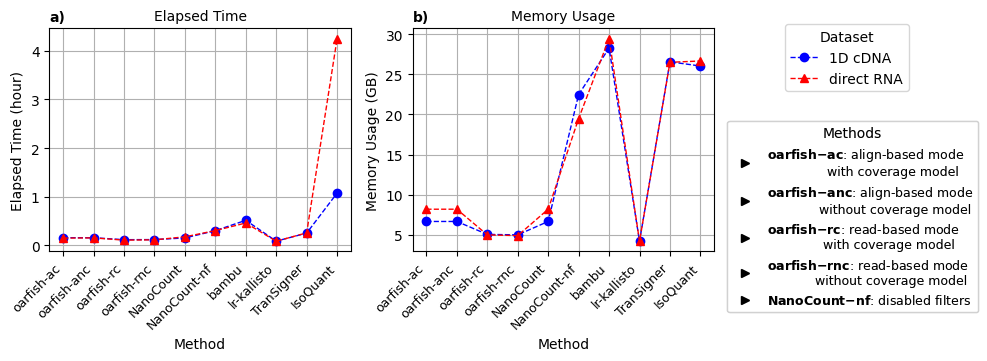

In [8]:
fig_path = '/mnt/scratch2/zahra/oarfish-paper-scripts/analysis_jupyter_notebook/figures/sim_data/NA12878/time_memory.jpg'
plot_function(final_df, fig_path)